<a href="https://colab.research.google.com/github/prajaktasonawane98/My-Projects/blob/main/Task1_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Students Performance Prediction using Linear Regression** 

**Data Science and Business Analytics Intern at The Sparks Foundation**

**Problem Statement** - Predict the percentage of an student based on the no. of study hours.

**DataSource Link** - http://bit.ly/w-data


In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Data Loading**

In [2]:
# reading the data from url

print("**Student Dataset**")
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
student_data.head()

**Student Dataset**


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Identifying the shape of the dataset(rows and columns)
student_data.shape

(25, 2)

# **Data Preparation**

In [4]:
# getting the information about data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# identifies if any row and column has a null values or no.
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# getting the description about dataset
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Exploratory Data Analysis**

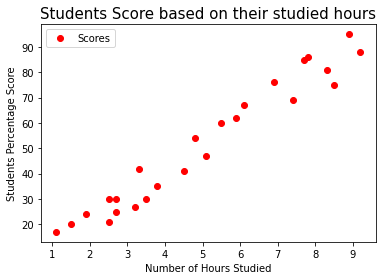

In [7]:
# Visualizing the scatter plot
# Identifiying the Students score based on their spending hours of study

student_data.plot(x='Hours', y='Scores', style="o", c='r')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Students Percentage Score')  
plt.title('Students Score based on their studied hours', fontsize=15)  
plt.show()

In [8]:
# devides the data for X(input) and y(output)

X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

# **Data Modeling**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,)

**Train the algorithm**

In [11]:
reg = LinearRegression()       #initilaizes the model
reg.fit(X_train, y_train)      #fits the model on traing set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

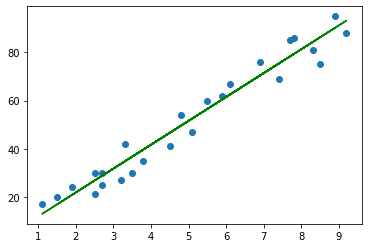

In [12]:
# ploting the regression graph

plane = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X, plane, color='green')

Each data point is close the regression line, means this dataset has a very less errors

In [13]:
# printing the coefficients

print(reg.intercept_)
print(reg.coef_)

2.018160041434662
[9.91065648]


**Prediction**

In [14]:
print(X_test)
y_pred = reg.predict(X_test)   #Predicting the scores
y_pred            

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# comparing actual versus predicted 

compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Q). What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hour=np.array([9.25])
prediction = reg.predict(hour.reshape(-1,1))
print("No of Hours = {}\n".format(hour))
print("Predicted Score = {}\n".format(prediction))

No of Hours = [9.25]

Predicted Score = [93.69173249]



# **Evaluation**

In [16]:
from sklearn import metrics 

In [17]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Absolute Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Absolute Error: 4.647447612100373


In [18]:
# Identifying the accuracy 
reg.score(X,y)

0.9526947647057273

**Thank You**